In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [29]:
df = pd.read_csv("faang_stock_prices.csv")

In [30]:
df = df.select_dtypes(include=np.number)

In [31]:
print(df.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7', 'SMA_21', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'Daily_Return', 'Volatility_7d', 'Next_Day_Close']


In [32]:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [33]:
df.columns = df.columns.str.lower()

In [34]:
['date', 'open', 'high', 'low', 'close', 'volume']

['date', 'open', 'high', 'low', 'close', 'volume']

In [35]:
df["Price_Range"] = df["high"] - df["low"]
df["Price_Change"] = df["close"] - df["open"]

In [36]:
X = df.drop("close", axis=1)
y = df["close"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape, y_train.shape)
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_train.dtypes)

(2570, 18) (2570,)
open               0
high               0
low                0
volume             0
sma_7              0
sma_21             1
ema_12             1
ema_26             1
rsi_14             1
macd               1
macd_signal        1
bollinger_upper    1
bollinger_lower    1
daily_return       1
volatility_7d      1
next_day_close     1
Price_Range        0
Price_Change       0
dtype: int64
0
open               float64
high               float64
low                float64
volume               int64
sma_7              float64
sma_21             float64
ema_12             float64
ema_26             float64
rsi_14             float64
macd               float64
macd_signal        float64
bollinger_upper    float64
bollinger_lower    float64
daily_return       float64
volatility_7d      float64
next_day_close     float64
Price_Range        float64
Price_Change       float64
dtype: object


In [39]:
df.columns = df.columns.str.lower()

In [40]:
df = df.select_dtypes(include=np.number)

In [41]:
df = df.dropna()

In [42]:
if "close" in df.columns:
    target = "close"
elif "adj_close" in df.columns:
    target = "adj_close"
else:
    target = df.columns[-1]   # safe fallback

X = df.drop(target, axis=1)
y = df[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Model trained successfully ✅")

Model trained successfully ✅


In [45]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [46]:
print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))

print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Linear Regression R2: 1.0
Random Forest R2: 0.9998722906324501
Random Forest MAE: 0.2244361217030285
Random Forest RMSE: 0.48390071249836025


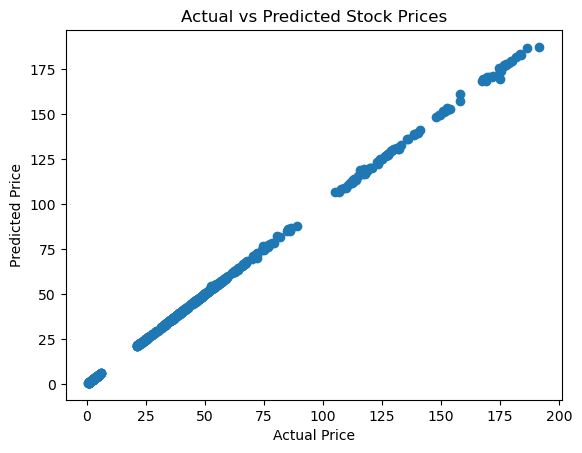

In [48]:
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Stock Prices")
plt.show()

In [49]:
data = {
    "Annual_Income": [15, 18, 20, 22, 25, 30, 60, 65, 70, 75, 80, 85],
    "Spending_Score": [39, 42, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\clust

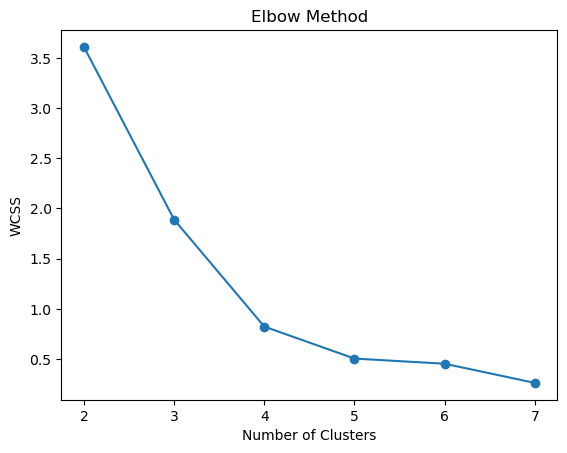

In [51]:
wcss = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [52]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Silhouette Score
score = silhouette_score(scaled_data, df["Cluster"])
print("Silhouette Score:", score)

print(df)

Silhouette Score: 0.5923042240359838
    Annual_Income  Spending_Score  Cluster
0              15              39        1
1              18              42        1
2              20              45        1
3              22              50        1
4              25              55        1
5              30              60        1
6              60              65        2
7              65              70        2
8              70              75        2
9              75              80        0
10             80              85        0
11             85              90        0


C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


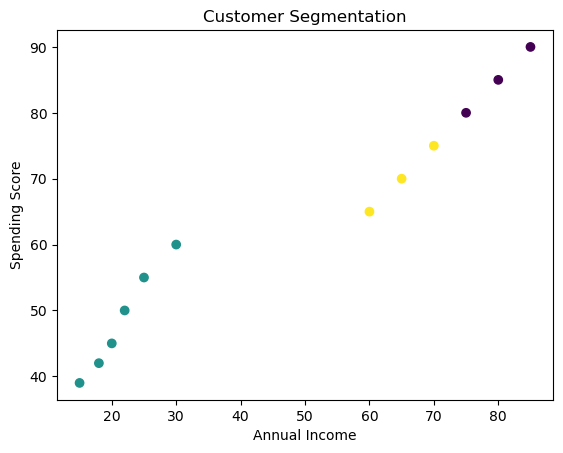

In [53]:
plt.figure()
plt.scatter(df["Annual_Income"], df["Spending_Score"], c=df["Cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()

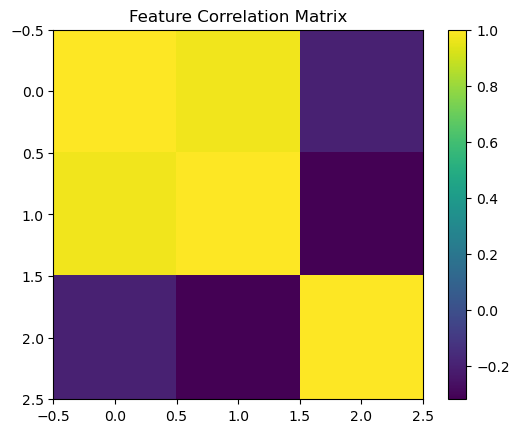

In [54]:
corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()

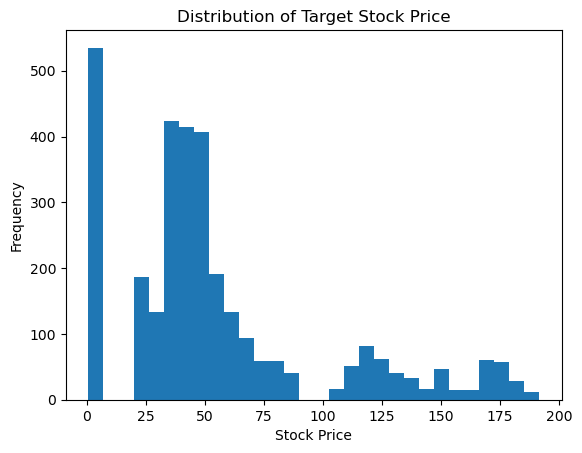

In [55]:
plt.figure()
plt.hist(y, bins=30)
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.title("Distribution of Target Stock Price")
plt.show()

In [58]:
# Prediction (MANDATORY)
y_pred = lr.predict(X_test)

In [59]:
errors = y_test - y_pred

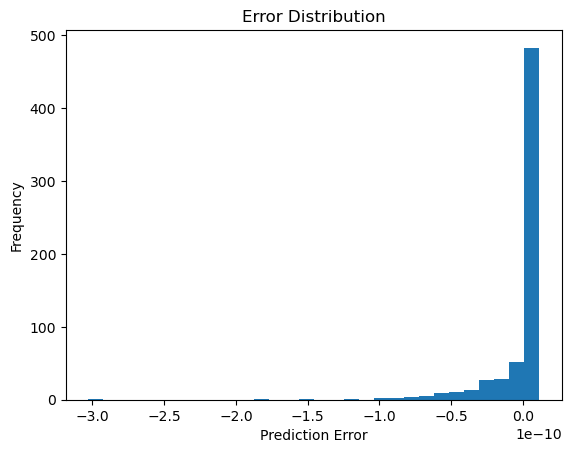

In [60]:
plt.figure()
plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

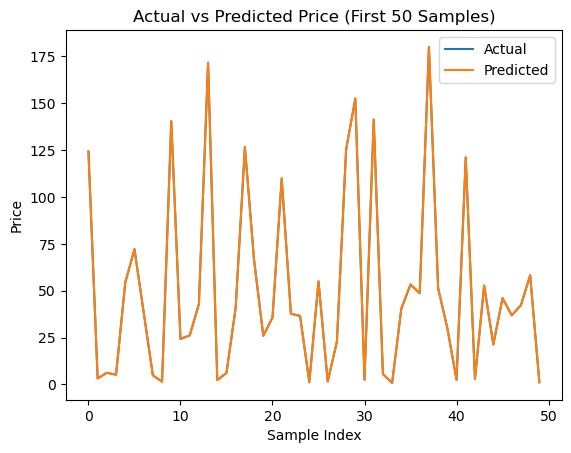

In [63]:
plt.figure()
plt.plot(y_test.values[:50])
plt.plot(y_pred[:50])
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Price (First 50 Samples)")
plt.legend(["Actual", "Predicted"])
plt.show()

In [66]:
# Safe correlation with target
corr_matrix = df.corr()

if target in corr_matrix.columns:
    corr_with_target = corr_matrix[target].drop(target)
else:
    print(f"Target column '{target}' not found in correlation matrix")
    corr_with_target = corr_matrix.iloc[:, -1]  # safe fallback


Target column 'close' not found in correlation matrix


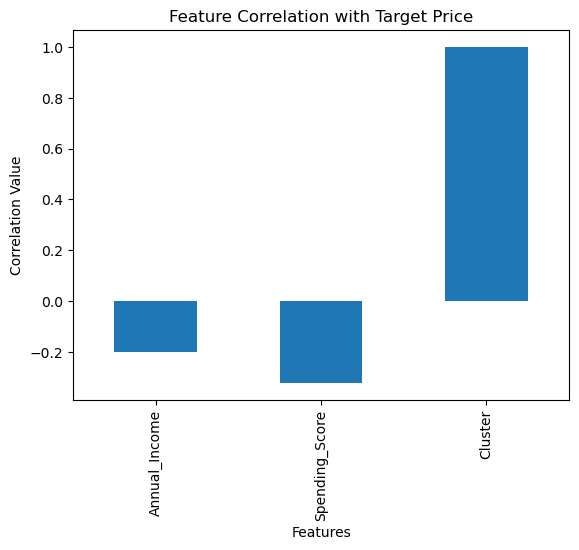

In [67]:
plt.figure()
corr_with_target.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.title("Feature Correlation with Target Price")
plt.show()

In [68]:
# auto-detect target safely
if "close" in df.columns:
    target = "close"
elif "adj_close" in df.columns:
    target = "adj_close"
else:
    target = df.columns[-1]

print("Target column used:", target)


Target column used: Cluster
